<a href="https://colab.research.google.com/github/sweetiepickle/AI-2023-midterm-report/blob/main/AI_midterm_flowers_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

flowers classification

In [1]:
#libraries
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten,  LeakyReLU
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# data -> model -> compile -> evaluate
%cd /content/drive/MyDrive/AI 2023/data/flower

/content/drive/MyDrive/AI 2023/data/flower


In [4]:
# step 1 : data initializing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# orginal value of an image is from 0 to 255
# target value is from 0 to 1 
resizeData = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)    
trainingData= resizeData.flow_from_directory('/content/drive/MyDrive/AI 2023/data/flower/train',target_size=(150,150), batch_size=32, class_mode='categorical')
inspectData= resizeData.flow_from_directory('/content/drive/MyDrive/AI 2023/data/flower/test',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1712 images belonging to 5 classes.
Found 1012 images belonging to 5 classes.


In [5]:
# folder classifying
trainingData.class_indices

{'hoa bỉ ngạn': 0,
 'hoa hồng': 1,
 'hoa hướng dương': 2,
 'hoa tulip': 3,
 'hoa tử đằng': 4}

In [6]:
# folder classifying
inspectData.class_indices

{'hoa bỉ ngạn': 0,
 'hoa hồng': 1,
 'hoa hướng dương': 2,
 'hoa tulip': 3,
 'hoa tử đằng': 4}

In [7]:
# step 2 : cnn netwwork  : sequential model
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
# Data flattening
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
# step 4 :compiling

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.fit(trainingData, batch_size = 128, epochs = 50 , verbose = 1)

Epoch 1/50
54/54 [==============================] - 611s 12s/step - loss: 1.3018 - accuracy: 0.4252
Epoch 2/50
54/54 [==============================] - 18s 337ms/step - loss: 1.1227 - accuracy: 0.5456
Epoch 3/50
54/54 [==============================] - 19s 356ms/step - loss: 0.9836 - accuracy: 0.5987
Epoch 4/50
54/54 [==============================] - 18s 341ms/step - loss: 0.9273 - accuracy: 0.6279
Epoch 5/50
54/54 [==============================] - 20s 379ms/step - loss: 0.8411 - accuracy: 0.6647
Epoch 6/50
54/54 [==============================] - 19s 353ms/step - loss: 0.7649 - accuracy: 0.6968
Epoch 7/50
54/54 [==============================] - 18s 341ms/step - loss: 0.7746 - accuracy: 0.6968
Epoch 8/50
54/54 [==============================] - 20s 360ms/step - loss: 0.7286 - accuracy: 0.7039
Epoch 9/50
54/54 [==============================] - 20s 361ms/step - loss: 0.6669 - accuracy: 0.7395
Epoch 10/50
54/54 [==============================] - 20s 361ms/step - loss: 0.6225 - accurac

In [19]:
# step 5 : evaluating
eva = model.evaluate(trainingData, verbose = 1 )
# verbose = 0 -> display nothing
# verbose = 1 -> display only learns recently
# verbose = 2 -> display everything learnt
print('loss: ', eva[0])
print('accuracy: ', eva[1])

54/54 [==============================] - 19s 344ms/step - loss: 0.1090 - accuracy: 0.9603
loss:  0.10895413905382156
accuracy:  0.9602803587913513


In [20]:
model.save('/content/drive/MyDrive/AI 2023/model AI/ flower classification.h5')

In [21]:
model_1=load_model('/content/drive/MyDrive/AI 2023/model AI/ flower classification.h5')

1/1 [==============================] - 0s 450ms/step
hoa tulip


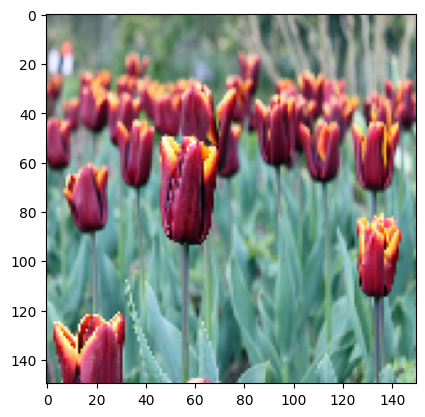

1/1 [==============================] - 0s 24ms/step
hoa hướng dương


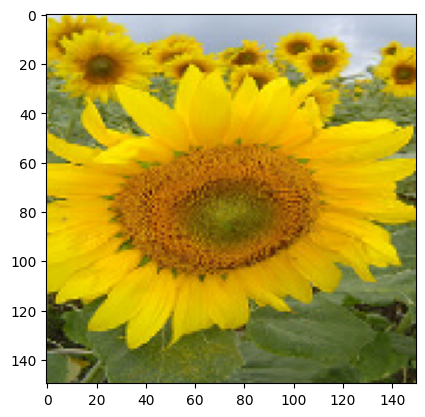

1/1 [==============================] - 0s 33ms/step
hoa tulip


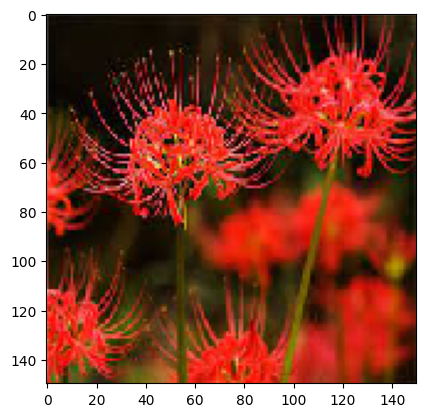

1/1 [==============================] - 0s 26ms/step
hoa bỉ ngạn


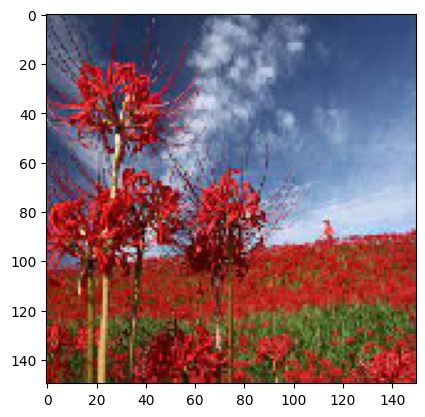

1/1 [==============================] - 0s 26ms/step
hoa tử đằng


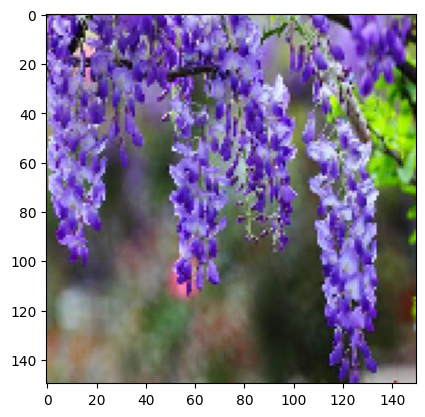

1/1 [==============================] - 0s 27ms/step
hoa tử đằng


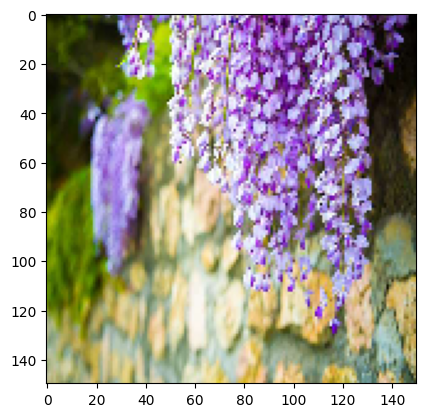

1/1 [==============================] - 0s 23ms/step
hoa tử đằng


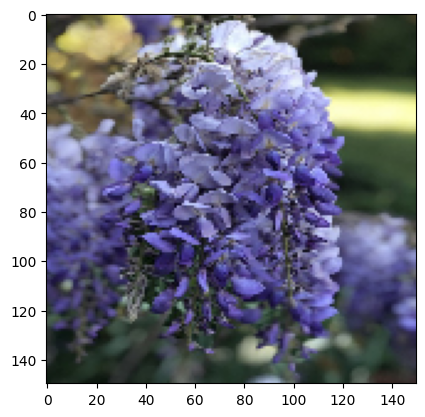

1/1 [==============================] - 0s 19ms/step
hoa hồng


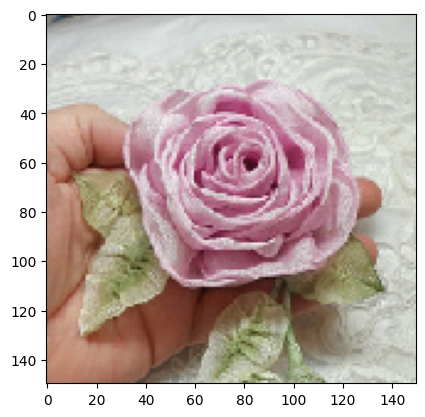

1/1 [==============================] - 0s 25ms/step
hoa tulip


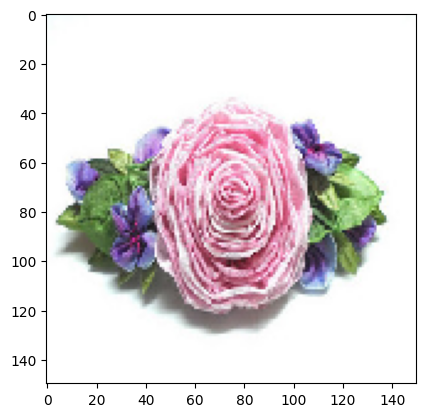

1/1 [==============================] - 0s 23ms/step
hoa hướng dương


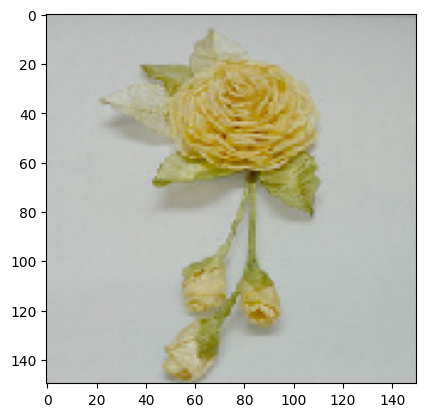

1/1 [==============================] - 0s 21ms/step
hoa hướng dương


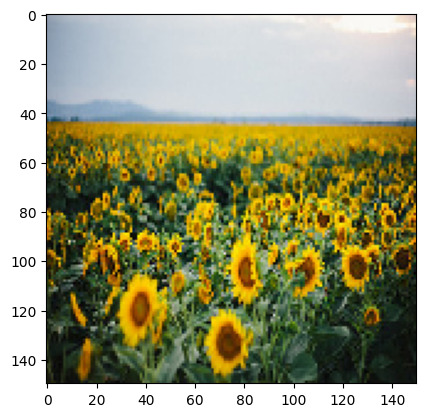

1/1 [==============================] - 0s 18ms/step
hoa hướng dương


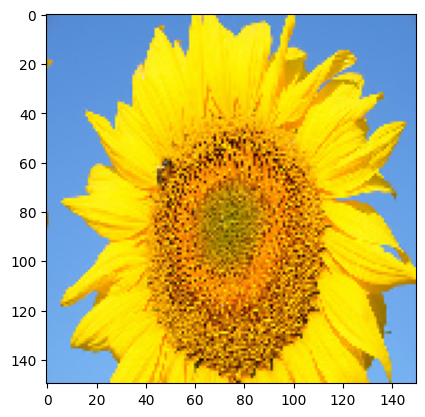

1/1 [==============================] - 0s 21ms/step
hoa bỉ ngạn


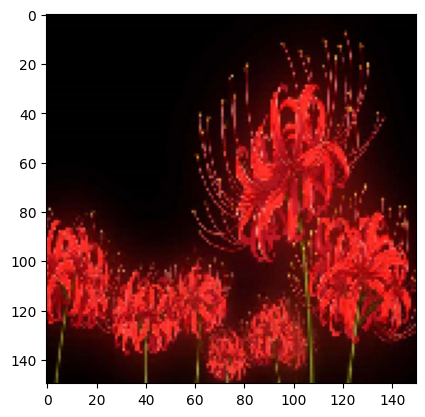

In [23]:
test = '/content/drive/MyDrive/AI 2023/data/flower/validation'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['hoa bỉ ngạn','hoa hồng','hoa hướng dương','hoa tulip','hoa tử đằng']
  print(class_name[result])
  plt.show()